<a href="https://colab.research.google.com/github/sandratreneska/FLAME-fire-detection/blob/main/Evaluate_FLAME_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
import pickle
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
IMG_HEIGHT = 254 
IMG_WIDTH = 254 
BATCH_SIZE = 64

In [5]:
# Load saved models

models_toptrained_paths = ['/content/drive/My Drive/toptrained_vgg16_model', '/content/drive/My Drive/toptrained_vgg19_model', '/content/drive/My Drive/toptrained_inception_model', '/content/drive/My Drive/toptrained_xception_model', '/content/drive/My Drive/toptrained_resnet50_model']
models_finetuned_paths = ['/content/drive/My Drive/finetuned_vgg16_model', '/content/drive/My Drive/finetuned_vgg19_model', '/content/drive/My Drive/finetuned_inception_model', '/content/drive/My Drive/finetuned_xception_model', '/content/drive/My Drive/finetuned_resnet50_model']

models_toptrained = {
  "vgg16_toptrained": keras.models.load_model(models_toptrained_paths[0]),
	"vgg19_toptrained": keras.models.load_model(models_toptrained_paths[1]),
	"inception_toptrained": keras.models.load_model(models_toptrained_paths[2]),
	"xception_toptrained": keras.models.load_model(models_toptrained_paths[3]), 
	"resnet50_toptrained": keras.models.load_model(models_toptrained_paths[4])
}
models_finetuned = {
  "vgg16_finetuned": keras.models.load_model(models_finetuned_paths[0]),
	"vgg19_finetuned": keras.models.load_model(models_finetuned_paths[1]),
	"inception_finetuned": keras.models.load_model(models_finetuned_paths[2]),
	"xception_finetuned": keras.models.load_model(models_finetuned_paths[3]), 
	"resnet50_finetuned": keras.models.load_model(models_finetuned_paths[4])
}

In [3]:
# Load models' history

history_toptrained = {
  "vgg16_toptrained": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_vgg16_history', "rb")),
	"vgg19_toptrained": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_vgg19_history', "rb")),
	"inception_toptrained": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_inception_history', "rb")),
	"xception_toptrained": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_xception_history', "rb")), 
	"resnet50_toptrained": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_resnet50_history', "rb"))
}
history_finetuned = {
  "vgg16_finetuned": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_vgg16_history', "rb")),
	"vgg19_finetuned": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_vgg19_history', "rb")),
	"inception_finetuned": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_inception_history', "rb")),
	"xception_finetuned": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_xception_history', "rb")), 
	"resnet50_finetuned": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_resnet50_history', "rb"))
}

In [4]:
MODEL_PREPROCESS = {
  "vgg16": tf.keras.applications.vgg16.preprocess_input,
	"vgg19": tf.keras.applications.vgg19.preprocess_input,
	"inception": tf.keras.applications.inception_v3.preprocess_input,
	"xception": tf.keras.applications.xception.preprocess_input, 
	"resnet50": tf.keras.applications.resnet50.preprocess_input
}

In [6]:
# Test dir
TEST_DIR = "/content/drive/My Drive/FLAME_dataset/Test"

In [ ]:
# Evaluate models

# Iterate top trained models
for (name, model), chosen_preprocess in zip(models_toptrained.items(), MODEL_PREPROCESS.values()):

  # Create test set
  testdatagen = ImageDataGenerator(
      data_format="channels_last",
      dtype=tf.float32,
      preprocessing_function=chosen_preprocess # different preprocess
  )

  test_data_gen = testdatagen.flow_from_directory(
      directory=TEST_DIR,
      target_size=(IMG_HEIGHT, IMG_WIDTH),
      batch_size=BATCH_SIZE,
      color_mode="rgb",
      class_mode="binary",
      shuffle=False,
      seed=123,
  )

  start_time = time.time()
  print("Model:", name)
  print("Evaluate on test data")
  results = model.evaluate(test_data_gen)
  print("Test loss, Test acc:", results)
  print("--- %s seconds ---" % (time.time() - start_time))
  print("-----------------------------------------------")

# Iterate fine tuned models
for (name, model), chosen_preprocess in zip(models_finetuned.items(), MODEL_PREPROCESS.values()):

  # Create test set
  testdatagen = ImageDataGenerator(
      data_format="channels_last",
      dtype=tf.float32,
      preprocessing_function=chosen_preprocess 
  )

  test_data_gen = testdatagen.flow_from_directory(
      directory=TEST_DIR,
      target_size=(IMG_HEIGHT, IMG_WIDTH),
      batch_size=BATCH_SIZE,
      color_mode="rgb",
      class_mode="binary",
      shuffle=False,
      seed=123,
  )

  start_time = time.time()
  print("Model:", name)
  print("Evaluate on test data")
  results = model.evaluate(test_data_gen)
  print("Test loss, Test acc:", results)
  print("--- %s seconds ---" % (time.time() - start_time))
  print("-----------------------------------------------")

Found 8617 images belonging to 2 classes.
Model: vgg16_toptrained
Evaluate on test data
135/135 [==============================] - 3023s 22s/step - loss: 0.7396 - accuracy: 0.7789
Test loss, Test acc: [0.739646315574646, 0.778925359249115]
--- 3023.1772198677063 seconds ---
-----------------------------------------------
Found 8617 images belonging to 2 classes.
Model: vgg19_toptrained
Evaluate on test data
135/135 [==============================] - 3756s 28s/step - loss: 0.6719 - accuracy: 0.6944
Test loss, Test acc: [0.6719279885292053, 0.6944411993026733]
--- 3756.2928578853607 seconds ---
-----------------------------------------------
Found 8617 images belonging to 2 classes.
Model: inception_toptrained
Evaluate on test data
135/135 [==============================] - 724s 5s/step - loss: 0.6727 - accuracy: 0.6748
Test loss, Test acc: [0.6726829409599304, 0.674828827381134]
--- 724.3525967597961 seconds ---
-----------------------------------------------
Found 8617 images belonging

Model: vgg16_toptrained


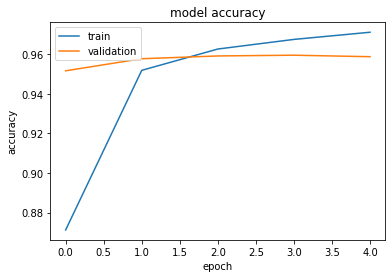

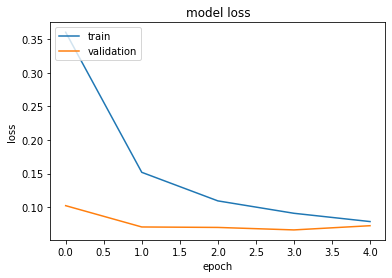

Model: vgg19_toptrained


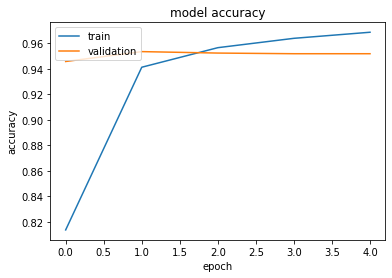

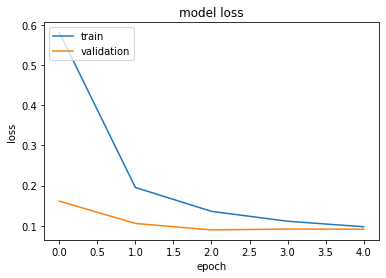

Model: inception_toptrained


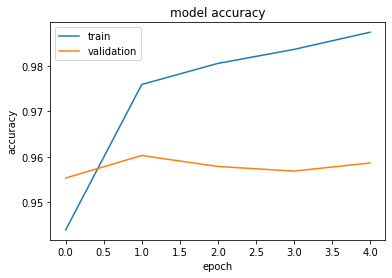

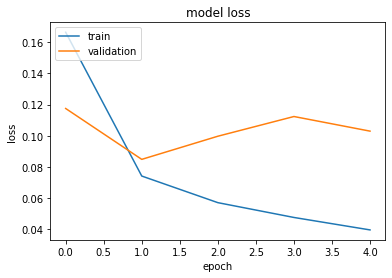

Model: xception_toptrained


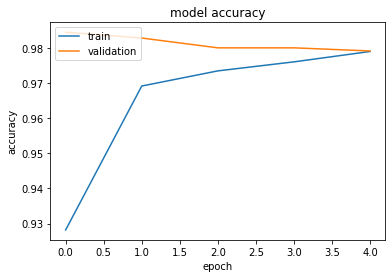

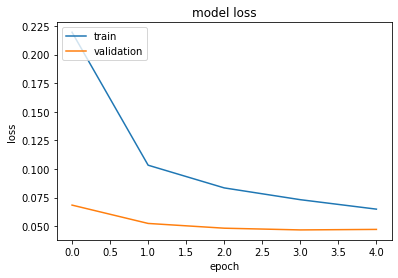

Model: resnet50_toptrained


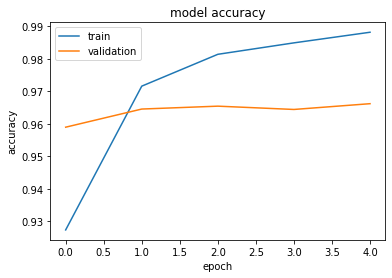

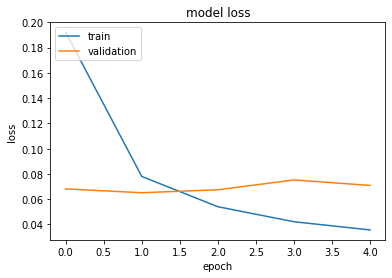

Model: vgg16_finetuned


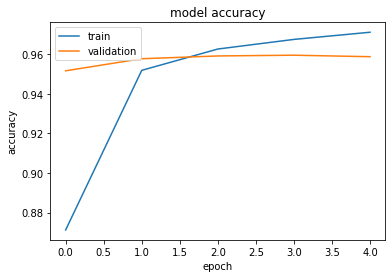

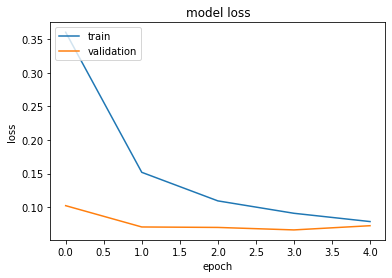

Model: vgg19_finetuned


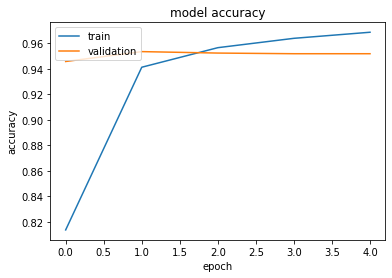

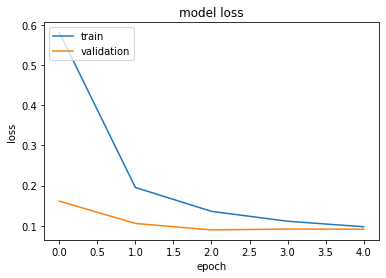

Model: inception_finetuned


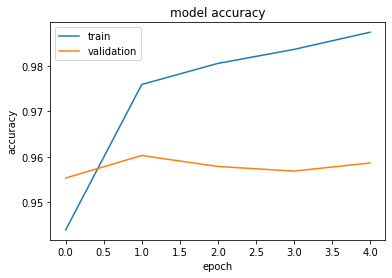

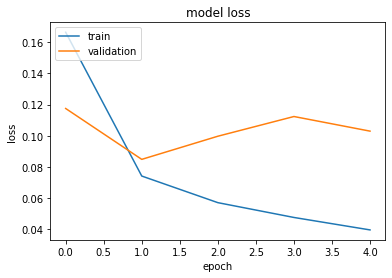

Model: xception_finetuned


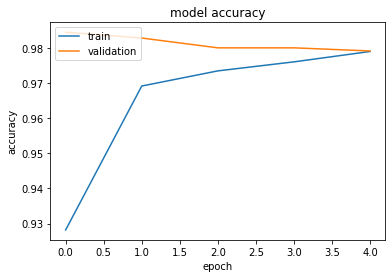

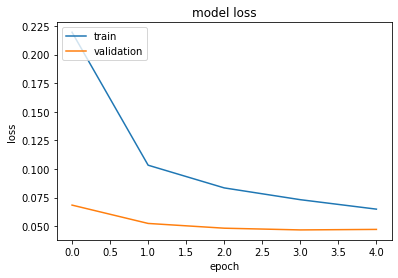

Model: resnet50_finetuned


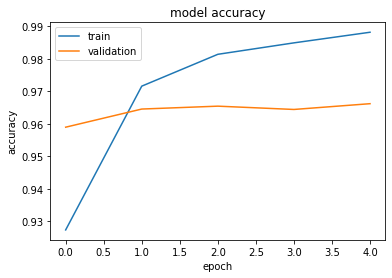

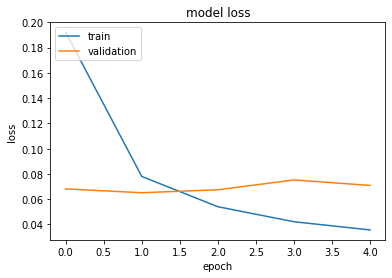

In [7]:
# Plot training and validation accuracies and losses
for name, history in history_toptrained.items():

  print("Model:", name)
  # summarize history for accuracy
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # summarize history for loss
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

for name, history in history_finetuned.items():

  print("Model:", name)
  # summarize history for accuracy
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # summarize history for loss
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

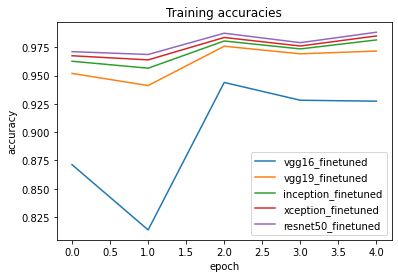

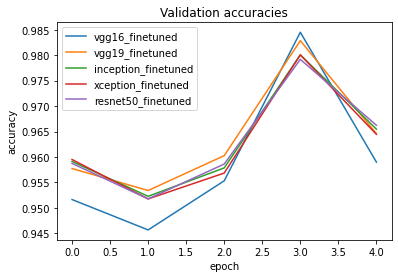

[[0.8712789416313171, 0.9518565535545349, 0.9626150131225586, 0.967470645904541, 0.9710885286331177], [0.8136782050132751, 0.9411615133285522, 0.9564899802207947, 0.9638209939002991, 0.9685813784599304], [0.9438908100128174, 0.9758806824684143, 0.9805141091346741, 0.9835925102233887, 0.9873690605163574], [0.928181529045105, 0.969184398651123, 0.9735004901885986, 0.9760710597038269, 0.9790225028991699], [0.9273564219474792, 0.9716280698776245, 0.9814344644546509, 0.9849571585655212, 0.9882259368896484]]
[[0.9516251683235168, 0.9577196836471558, 0.9591162800788879, 0.9594972133636475, 0.9587354063987732], [0.9456576704978943, 0.9534027576446533, 0.9522600173950195, 0.9517521858215332, 0.9517521858215332], [0.9553072452545166, 0.9602590203285217, 0.9578466415405273, 0.9568308591842651, 0.9586084485054016], [0.9845098853111267, 0.9828593134880066, 0.9800660014152527, 0.9800660014152527, 0.9791772365570068], [0.9589893221855164, 0.9645759463310242, 0.96546471118927, 0.9644489884376526, 0.96

In [17]:
# All fine-tuned accuracies on one plot

accuracies = []
val_accuracies = []
names = []
for name, history in history_finetuned.items():
  accuracies.append(history['accuracy'])
  val_accuracies.append(history['val_accuracy'])
  names.append(name)

# training
plt.plot(accuracies)
plt.title('Training accuracies')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='lower right')
#plt.savefig('/content/drive/My Drive/Plots/finetuned_train_acc.png', dpi=100)
plt.show()

# validation
plt.plot(val_accuracies)
plt.title('Validation accuracies')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
#plt.savefig('/content/drive/My Drive/Plots/finetuned_val_acc.png', dpi=100)
plt.show()

print(accuracies)
print(val_accuracies)

In [ ]:
# Get folder/model size
def getFolderSize(folder):
    total_size = os.path.getsize(folder)
    for item in os.listdir(folder):
        itempath = os.path.join(folder, item)
        if os.path.isfile(itempath):
            total_size += os.path.getsize(itempath)
        elif os.path.isdir(itempath):
            total_size += getFolderSize(itempath)
    return total_size

In [ ]:
# Model summaries and size
# Iterate top trained models
for (name, model), model_path in zip(models_toptrained.items(), models_toptrained_paths):
  print(name)
  print(model.summary())
  print("Size: " + str(getFolderSize(model_path))+ ' bytes')
  print('----------------------------------------')

# Iterate fine tuned models
for (name, model), model_path in zip(models_finetuned.items(), models_finetuned_paths):
  print(name)
  print(model.summary())
  print("Size: " + str(getFolderSize(model_path)) + ' bytes')
  print('----------------------------------------')

vgg16_toptrained
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 254, 254, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_________________________________________________________________
None
Size: 59319460 bytes
----------
vgg19_toptrained
Model: "model"
_____________________________